# Project: Investigate No-show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

No-show appointments dataset contains information about the Patient appointments in Brazil and the data fields are-
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
No show- ‘No’ means if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

The following questions will be answered after the Data Analysis-

1) How many patients showed up to their appointments and how many of them enrolled in welfare program?
2) What is the number of Male and Female patients?
3) Which is the age group having maximum patients?
4) Which hour of the day has maximum appointments in the dataset?
5) Which are the top 5 hospitals having maximum appointments?

In [1]:
# Importing packages needed for Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# Reading Data File
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Data Cleaning

In [3]:
# There are no null values and duplicate values.Only changing the datatypes of ScheduledDay, AppointmentDay and  PatientId.

df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['PatientId']=df['PatientId'].astype('int')

In [4]:
# Function to convert DataFrame object and returning list x,y

def changetodict(df1):
    x=[]
    y=[]
    dicthos=df1.to_dict()
    for key,value in dicthos.items():
        x.append(key)
        y.append(value)
    return (x,y)

def histvalue(x,y):
    df1=df.groupby([x,y]).count()['Gender']
    x=[]
    y=[]
    dicthos=df1.to_dict()
    for key,value in dicthos.items():
        x.append(key)
        y.append(value)
    return(x,y)


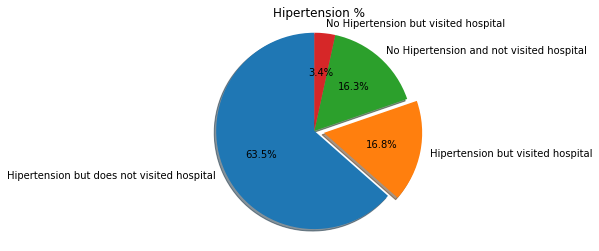

In [5]:
# Pie chart, showing the percentage patients having Hipertension.
'''
    From the chart it is clear that 19.7% people have Hipertension and out of which 16.3% showed to the hospital.
'''
x,y=histvalue('Hipertension','No-show')
labels = ['Hipertension but does not visited hospital','Hipertension but visited hospital','No Hipertension and not visited hospital'
          ,'No Hipertension but visited hospital']
sizes = y
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
plt.title('Hipertension %')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


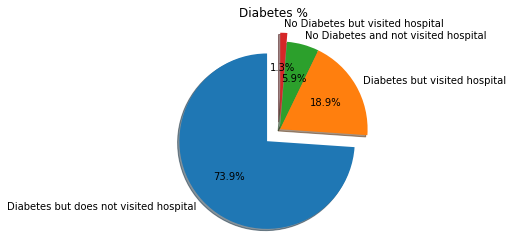

In [6]:
# Pie chart, showing the percentage patients having Diabetes.
'''
    From the chart it is clear that 7.2% people have Diabetes and out of which 5.9% showed to the hospital.
'''
x,y=histvalue('Diabetes','No-show')
labels = ['Diabetes but does not visited hospital','Diabetes but visited hospital','No Diabetes and not visited hospital'
          ,'No Diabetes but visited hospital']
sizes = y
explode = (0.2, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
plt.title('Diabetes %')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

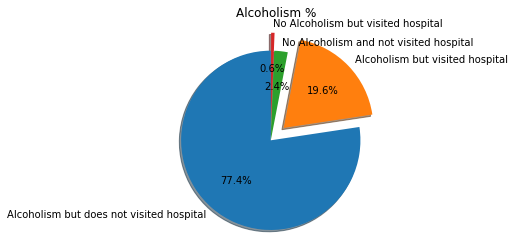

In [7]:
# Pie chart, showing the percentage patients having Alcoholism.
'''
    From the chart it is clear that 3% people have Alcoholism problem and out of which 2.4% showed to the hospital.
'''
x,y=histvalue('Alcoholism','No-show')
labels = ['Alcoholism but does not visited hospital','Alcoholism but visited hospital','No Alcoholism and not visited hospital'
          ,'No Alcoholism but visited hospital']
sizes = y
explode = (0, 0.2, 0, 0.2)
fig1, ax1 = plt.subplots()
plt.title('Alcoholism %')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

No-show  Scholarship
No       0              79925
         1               8283
Yes      0              19741
         1               2578
Name: AppointmentID, dtype: int64


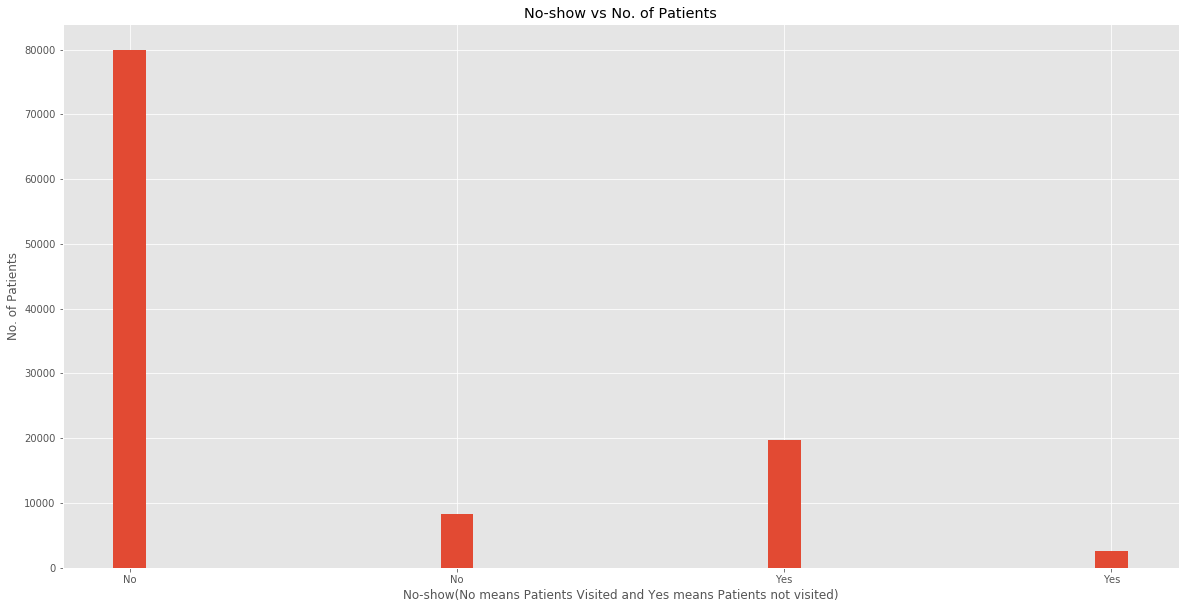

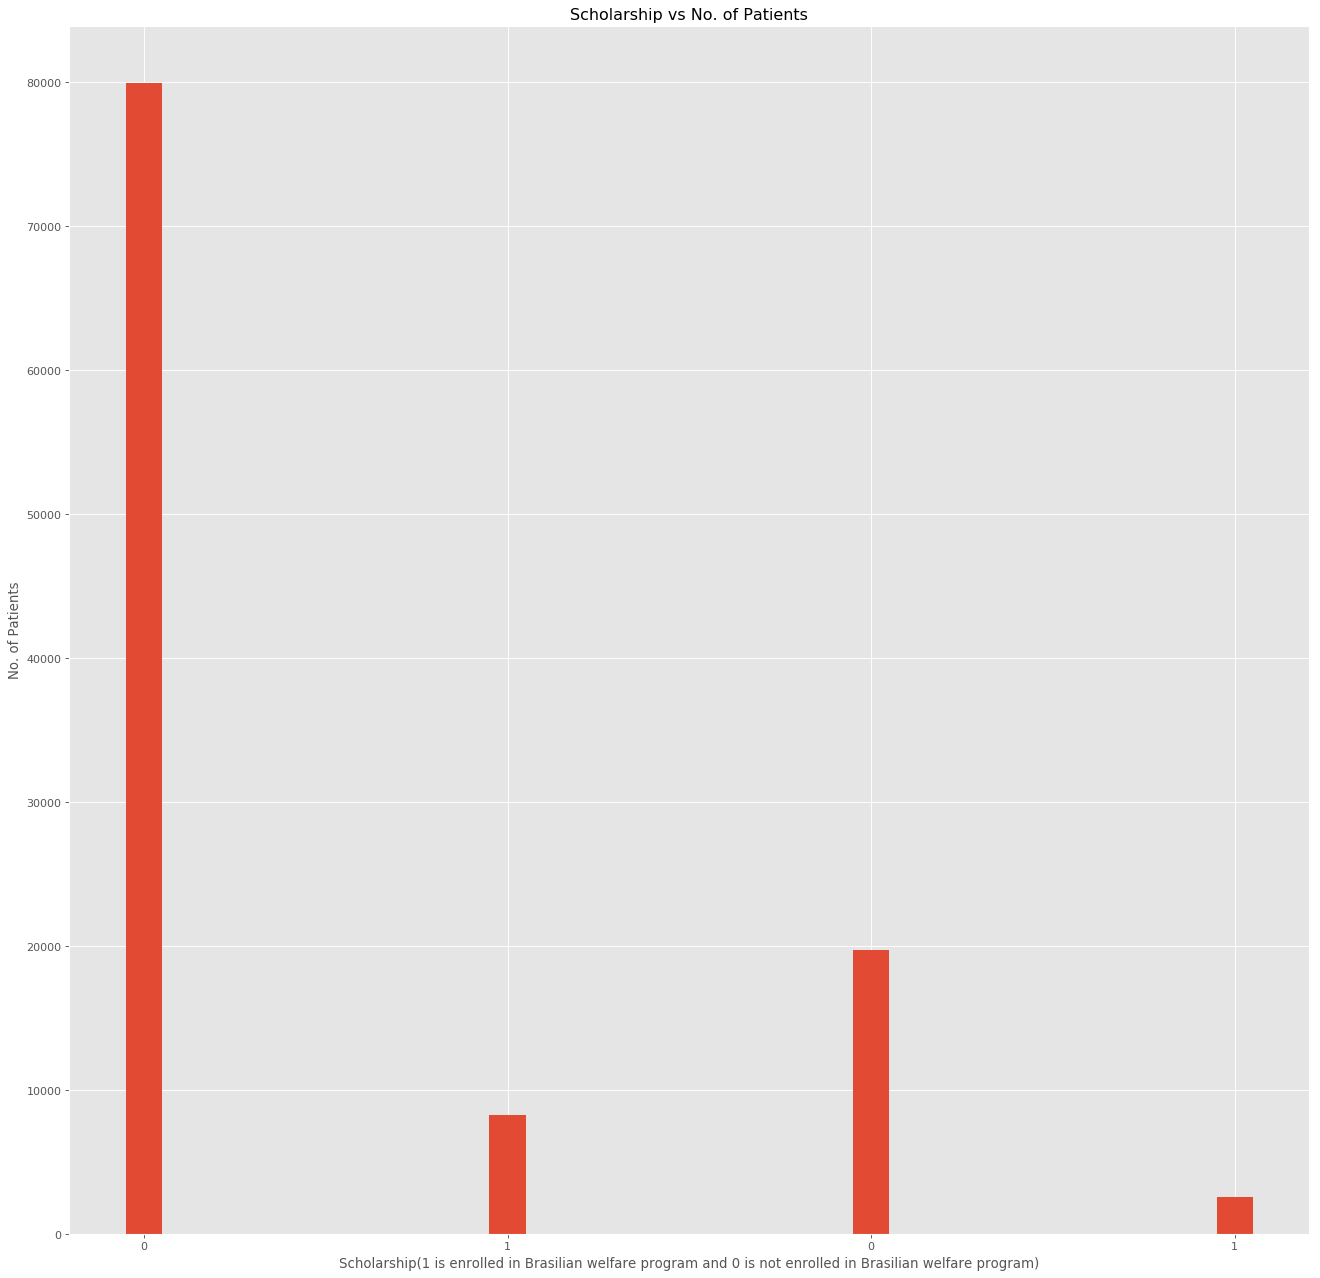

In [8]:
#  How many patients showed up to their appointments and how many of them enrolled in welfare program?
'''
    Out of the total 110527 patients, 79925 patients showed to the hospital and were not enrolled in Brazilian welfare program.
    8283 patients showed and part of Brazilian welfare program.
    
    19741 were neither showed to the hospital and neither part of Brazilian welfare program.2578 patients were part of Brazilian 
    welfare program but didn't showed to the hospital.
'''   

style.use('ggplot')
fig,ax = plt.subplots(figsize=(20,10))
tt=[1,2,3,4]
df1=df.groupby(['No-show', 'Scholarship']).count()['AppointmentID']
print(df1)
x,y=changetodict(df1)
xx,yy=zip(*x)
plt.xlabel('No-show(No means Patients Visited and Yes means Patients not visited)')
plt.ylabel('No. of Patients')
plt.title('No-show vs No. of Patients')
plt.bar(tt, y, width=0.1,tick_label=xx)
plt.show()
plt.figure(figsize=(20,20), dpi=80)
plt.xlabel('Scholarship(1 is enrolled in Brasilian welfare program and 0 is not enrolled in Brasilian welfare program)')
plt.ylabel('No. of Patients')
plt.title('Scholarship vs No. of Patients')
plt.bar(tt, y, width=0.1,tick_label=yy)
plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

### What is the number of Male and Female patients?

Gender
F    71840
M    38687
Name: AppointmentID, dtype: int64


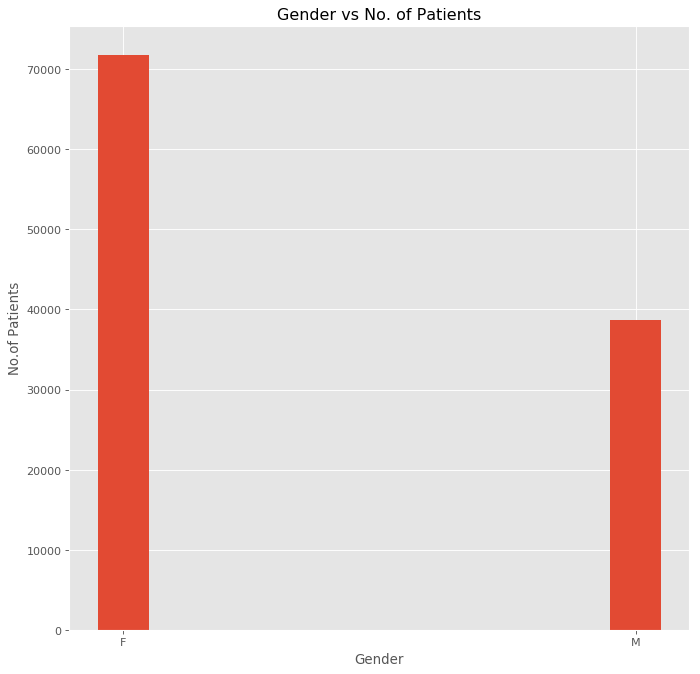

In [9]:
'''
    Out of the total 110527 patients,71840 were female and 38687 were men.
    This chart proves that no. of female patients were more than men patients.
'''
df1=df.groupby(['Gender']).count()['AppointmentID']
print(df1)
total=df['Gender'].count()
x,y=changetodict(df1)
xx=[1,2]
style.use('ggplot')
plt.figure(figsize=(10,10), dpi=80)
plt.xlabel('Gender')
plt.ylabel('No.of Patients')
plt.title('Gender vs No. of Patients')
plt.bar(xx, y, width=0.1,tick_label=x)
plt.show()

### Which is the age group having maximum patients?

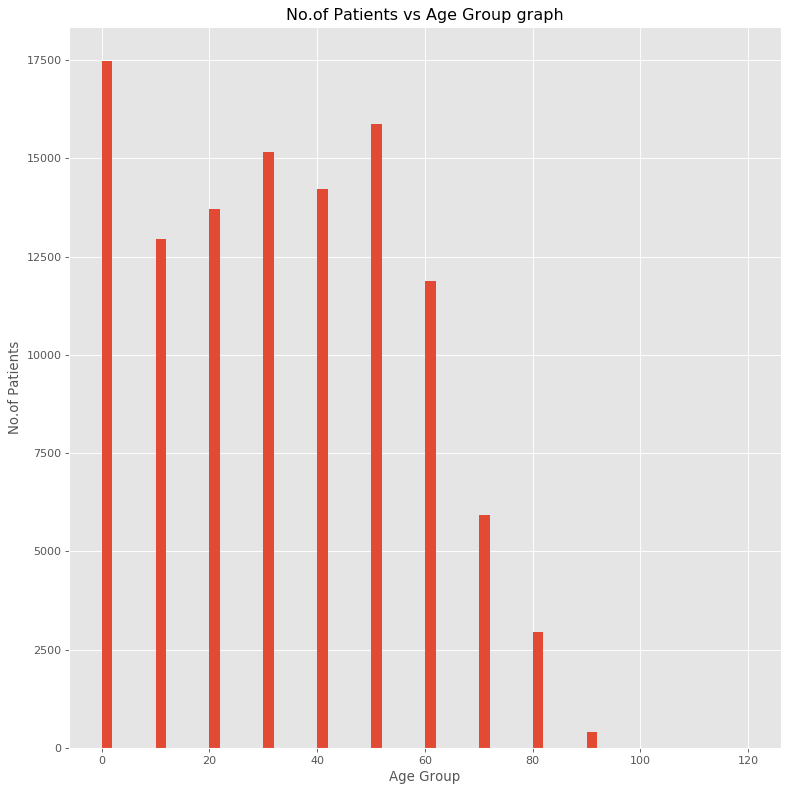

In [10]:
'''
    This chart shows that 0-10 age group has maximum no. of patients.This can help us to understand the age group 
    most affected from diseases.
'''
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120]
style.use('ggplot')
plt.figure(figsize=(10,10), dpi=80)
plt.hist(df['Age'],bins, histtype='bar', width=2)
plt.xlabel('Age Group')
plt.ylabel('No.of Patients')
plt.title('No.of Patients vs Age Group graph')
plt.tight_layout()
plt.show()

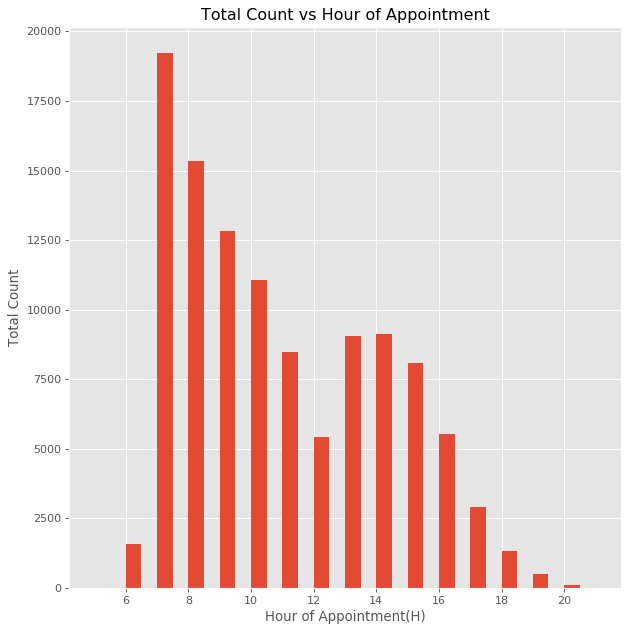

In [11]:
# Which hour of the day has maximum appointments in the dataset?
'''
    This chart helps in understanding at what time(hour of day), the most appointments are made.
    So, from the analysis, it is clear that at 7 o'clock time we have maximum appointments.
    
    It is also clear that maximum people opt for appointment mainly before 12p.m.
'''
df['hour'] = pd.DatetimeIndex(df['ScheduledDay']).hour
style.use('ggplot')
plt.figure(figsize=(8,8), dpi=80)
bins=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
plt.xlabel('Hour of Appointment(H)')
plt.ylabel('Total Count')
plt.title('Total Count vs Hour of Appointment')
plt.hist(df['hour'],bins, histtype='bar', width=0.5)
plt.tight_layout()
plt.show()

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
dtype: int64


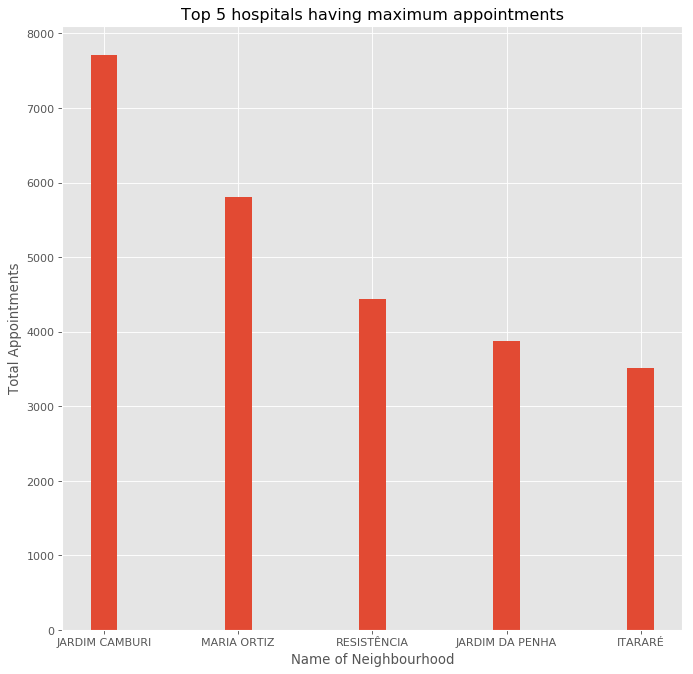

In [12]:
#  Which are the top 5 hospitals having maximum appointments?
'''
    This chart helps us to understand that which are the top 5 hospitals having maximum appointments.
    Results are as follows-
    JARDIM CAMBURI     7717
    MARIA ORTIZ        5805
    RESISTÊNCIA        4431
    JARDIM DA PENHA    3877
    ITARARÉ            3514
'''

df2=pd.value_counts(df['Neighbourhood'].values)
df3=df2.head(5)
print(df3)
x,y=changetodict(df3)
style.use('ggplot')
plt.figure(figsize=(10,10), dpi=80)
xx=[1,2,3,4,5]
plt.xlabel('Name of Neighbourhood')
plt.ylabel('Total Appointments')
plt.title('Top 5 hospitals having maximum appointments')
plt.bar(xx,y,width=0.2,tick_label=x)
plt.show()

<a id='conclusions'></a>
## Conclusions

From above analysis, I can conclude that 88208 out of 110527 patients visited hospital and majority was not enrolled in Brasilian welfare program.
Female patients was higher than the male patients and the majority patients falls under the age of 0-10 age group.

The most appointment was done for 7o'clock and the Jardim Camburi was the hospital where maximum appointments were done.

Limitation:

1) Data wasn't sufficient for relation between diseases patient have and patients visited for these diseases.
2) There was some patients which have no mentioned disease but they showed to the hospital.
3) There should be one column "Other Disease" so that rest of the patients can fall under this category.
4) SMS_received column doesn't impact the appointment to be showed up.